# Introduction
## Research Question
Does the Threads app possess signs of longevity in the oligopoly of social media apps, based on what people commonly say about the app?
## Overview
- To answer the research question with our dataset, we make conclusions about the longevity of the Threads app through social context, with user review text analysis, keeping limitations in mind. 
- This project applies basic statistical analysis on the dataset and performs sentiment analysis to determine sentiment over time towards the Threads app. Sentiment towards the app over time is main source of evidence we will use make conclusions related to our research question.
- This project describes a narrative of how the conclusions were reached and describes the sequential thought process behind all steps being made.
    
### Dataset

- The project uses a kaggle dataset sourced from: https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews/code
- This dataset contains about 32.9k reviews with 4 columns for each review describing the source, review description, rating, and review date.
- There is also related exploratory data analysis on this dataset available in the link provided on Kaggle. These projects also tend to explore the sentiment of the data and attempt to model a classifier to classify review sentiment related to the Threads app. This seems to be only related work on this dataset.

### Motivations
- My motivations for looking into this data were to first to challenge myself with a NLP dataset as I don't often work with NLP data. 
- Second, with all the news on Threads recently, I thought it would be interesting to evaluate what people thought of the app and if these reviews had some underlying pattern. 
- Lastly, it'd also be interesting to look further into what draws people to new social media apps considering the established giants of the social media industry. 

# Methods / Data Exploration
## Preliminary Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import nltk
from nltk.sentiment import vader
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

!pip install TextBlob
from textblob import TextBlob

%matplotlib inline

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [2]:
df = pd.read_csv("threads_reviews.csv")

In [3]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [5]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


## Insight 1
In the above cells, we explore the dataset to plan the types of data cleaning we need to do. We determine whether or not we need to handle null data and dive deeper in the type of data we are working with. We see that we are working with mainly categorical data. After getting a sense of our dataset above, I decided to apply some basic data augmentation to get some more information out of the dataset. Below, I create two new columns with relevant information we may need to help answer my research questions. The first column I added was "review_length" which calculated the number characters in a review. This would help me better understand how long each review was. The second column I added was "days_after_launch". I felt that this column would help me better understand the app's popularity during the timeframe provided in the dataset.  

In [6]:
def days_after(date):
    # date that Threads was launched:
    date_start = datetime.datetime(2023, 7, 5)
    
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    
    date_diff = date_obj - date_start
    return date_diff.days

In [7]:
df["review_length"] = df["review_description"].apply(lambda x: len(x))
df["days_after_launch"] = df["review_date"].apply(days_after)

In [8]:
df.describe()

,rating,review_length,days_after_launch
count,32910.000000,32910.000000,32910.000000
mean,3.398481,65.734913,3.868247
std,1.751480,104.900408,4.287783
min,1.000000,1.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,4.000000,28.000000,2.000000
75%,5.000000,79.000000,5.000000
max,5.000000,5947.000000,20.000000


In [9]:
df.head()

,source,review_description,rating,review_date,review_length,days_after_launch
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,465,3
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,475,14
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,497,1
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,487,5
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,426,1


In [10]:
ratings_count = df["rating"].value_counts().reset_index()
sources_count = df["source"].value_counts().reset_index()
avg_rating = df.groupby("days_after_launch")["rating"].mean().reset_index()

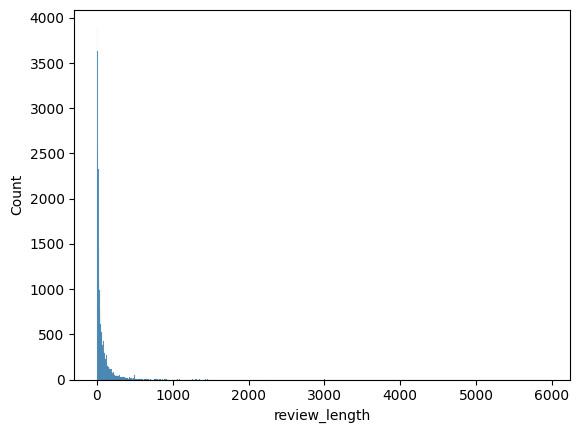

In [11]:
sns.histplot(df["review_length"])
plt.show()

## Insight 2
Above, I attempt to get a visualization of how long each review is and how common each review length is to see how much users have to say about the app. We see above that trying to plot a histogram plot of the review length is not very informative thus I pivot to a scatter plot / histogram variation below plotting the length of review vs days after launch to get my desired visualization.

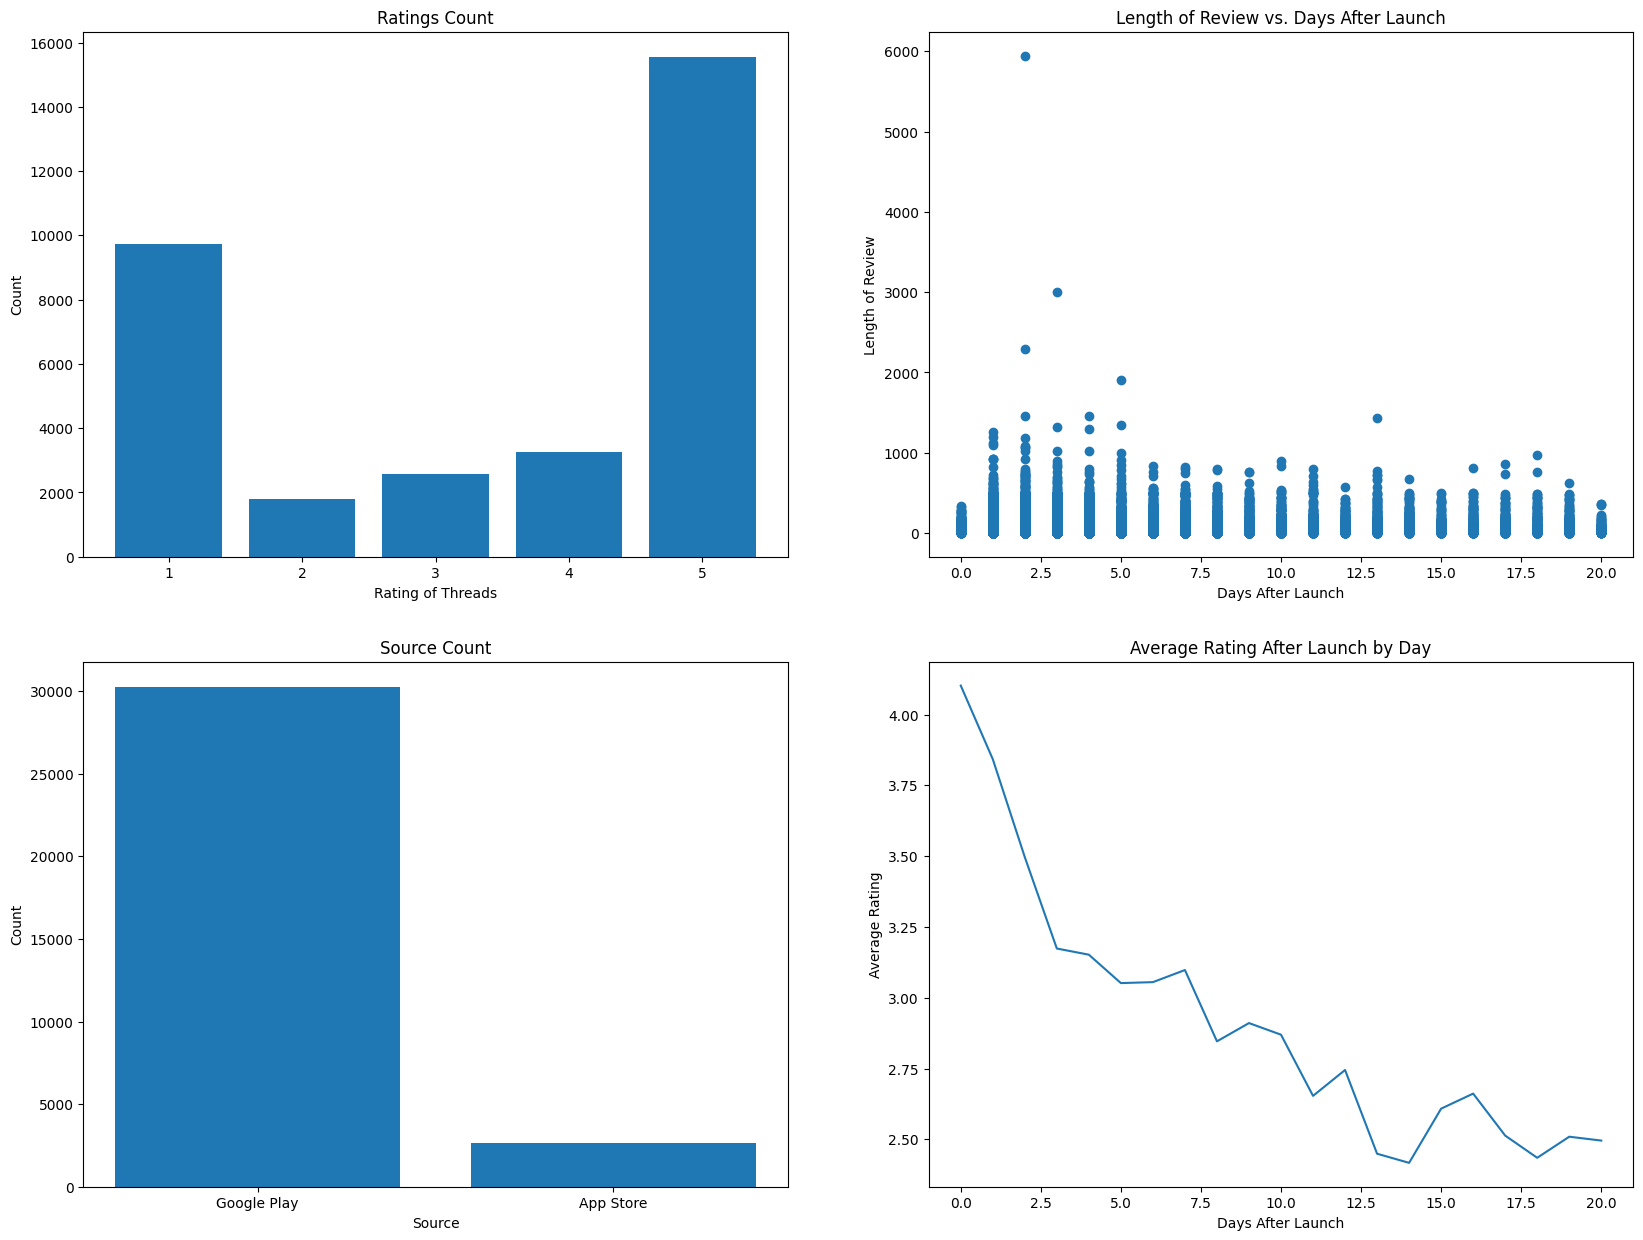

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax[0,0].bar(ratings_count["index"], ratings_count["rating"])
ax[0,0].set_title("Ratings Count")
ax[0,0].set_xlabel("Rating of Threads")
ax[0,0].set_ylabel("Count")

ax[0,1].scatter(df["days_after_launch"], df["review_length"])
ax[0,1].set_title("Length of Review vs. Days After Launch")
ax[0,1].set_xlabel("Days After Launch")
ax[0,1].set_ylabel("Length of Review")

ax[1,0].bar(sources_count["index"], sources_count["source"])
ax[1,0].set_title("Source Count")
ax[1,0].set_xlabel("Source")
ax[1,0].set_ylabel("Count")

ax[1,1].plot(avg_rating["days_after_launch"], avg_rating["rating"])
ax[1,1].set_title("Average Rating After Launch by Day")
ax[1,1].set_xlabel("Days After Launch")
ax[1,1].set_ylabel("Average Rating")

plt.show()

## Insight 3
To provide us with preliminary information to better understand the behavior of the users within our dataset, we apply basic statisitcal analysis to our dataset and display them visually to easily understand trends from a third person perspective. I dive into the reasoning and analysis of each figure below.

#### "Ratings Count" - How many people rated the Threads app and what rating did each user give?
With this plot, I aimed to get an overall idea of what people thought of the app. We see that the majority of the ratings were either 1 or 5, the lowest and highest ratings respectively. This is a great representation of survey bias in the data where people that take the time to "answer the survey" usually have strong opinions about the topic, negative or positive. This implies that any conclusions we make will be slightly biased towards those that gave a review and may not be representative of all users.

#### "Source Count" - Where are people giving their reviews? 
This simple bar plot was made to help visually display where users were leaving their reviews. We see that there is a significant difference between where the review was left in favor of "Google Play". This tells us that the dataset is mostly representative of Android users and it would be insufficient to conclude much about iPhone Threads app users since the sample size is so small for them. Knowing this, I know to stay away from making conclusions about the difference in reviews between the two review sources.

#### "Length of Review vs. Days After Launch" - Are users more engaged in their reviews over time?
This plot is a scatter plot / histogram variation. This plot accurately displays the outliers in review length and when they occur as time progress. We see that there are few outlier reviews of very long lengths closer to the launch date and less as time progress. The review length generally stays the same as time progresses with potentially slight decrease in number of reviews over time. This tells us how much users have to say about the app in a review generally does not increase or decrease over time. It does however seem people are slightly more willing to write longer reviews about the app closer to the start date. From this, we can resonably infer when launching an app, we can expect the majority of our feedback to occur closer to the launch date.

#### "Average Rating After Launch by Day" - What do people think about the Threads app overtime?
To help gage the overall consensus on the app over time, we create a line chart that helps us easily identify the slopes in relation to change in average rating per day. We see that as time progress the average rating of the reviews left tends to decrease. This may indicate that either users are leaving their reviews too early or that Meta's high value customers downloaded Threads earlier leaving good reviews. However as time went on, those not so big a fan of Meta began to leave their reviews hence the high early average ratings. This plot may also indicate social media app reviews may be biased towards initial loyal customers during the beginning of their launch and the succeeding days following the launch is where these apps get more honest reviews.

## User Review Text Analysis
After analyzing the dataset above with generic statistics, we have built context to our question and dataset helping us narrow our direction forward. We now understand the things our data can illuminate and what it cannot. Specifically our data cannot illuminate conclusions about Google Play vs App Store users because of the disparity in sample size. Furthermore, length of a review over time doesn't seem to highlight anything significant. However, it appears the dataset may be able to illuminate what the users think of Threads over time. Thus moving forward, I aim to focus the rest of my analysis on the reviews themselves. I want dig deeper in to the language used in these reviews, commonalities, and other factors related to language. By further analyzing the language used, we will be more equipped answer the research question. 


In [13]:
sia = vader.SentimentIntensityAnalyzer()

def getSentiment(review):
    """
    function to obtain sentiment.
    """
    return sia.polarity_scores(review)['compound']

def getHeavyWords(review):
    """
    function to obtain a list of notable words from review.
    """
    sentences = sent_tokenize(review)
    words = []
    for s in sentences:
        for w in word_tokenize(s):
            words.append(w.lower())
            
    myStopWords = list(punctuation) + stopwords.words('english')
    
    wordsNoStop = []
    for i in words:
        if i not in myStopWords:
            wordsNoStop.append(i)
    
    return wordsNoStop

In [14]:
df["sentiment"] = df["review_description"].apply(getSentiment)

<Axes: xlabel='sentiment', ylabel='Count'>

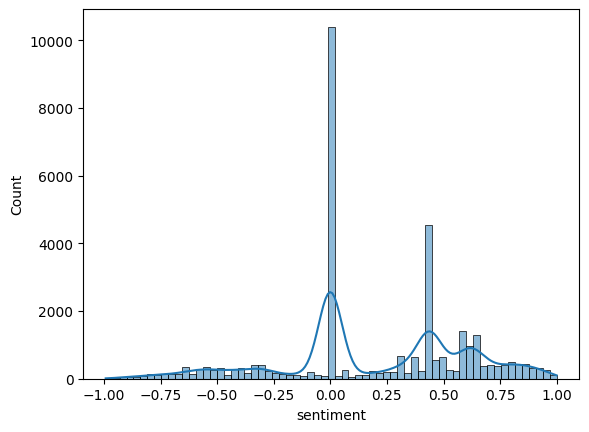

In [15]:
sns.histplot(df["sentiment"], kde=True)

## Insight 4
After obtaining the sentiment for all reviews using nltk's vader "SentimentIntensityAnalyzer," we see that it is unable to identify a large portion of the dataset as either positive or negative from the above histogram plot. We see that the majority of the reviews were rated as neutral which was inconsistent with our findings for ratings count where we found the majority of the reviews to extremly negative or positive. This tells us that we may need to use a new sentiment scorer or that we need to clean our data a little more. 

However, I want to take this as an opportunity to dive into the extreme reviews of the dataset. This is because if I was a Threads app developer, these datapoints would be ones I would focus on to obtain crucial feedback in which I would use to determine user consensus on the app overtime. Thus, in the following section, we continue to dive deeper into the sentiment of the reviews by exploring the most common words used. By exploring the most common words used, we can validate the sentiment and find commonalities between reviews.

In [16]:
negative = df[df["sentiment"] < 0]
positive = df[df["sentiment"] > 0]
neutral = df[df["sentiment"] == 0]

negative["review_description"] = negative["review_description"].apply(getHeavyWords)
positive["review_description"] = positive["review_description"].apply(getHeavyWords)
neutral["review_description"] = neutral["review_description"].apply(getHeavyWords)

# convert word lists into one master word list:
positive_words = positive["review_description"].explode().tolist()
negative_words = negative["review_description"].explode().tolist()
neutral_words = neutral["review_description"].explode().tolist()

# Results

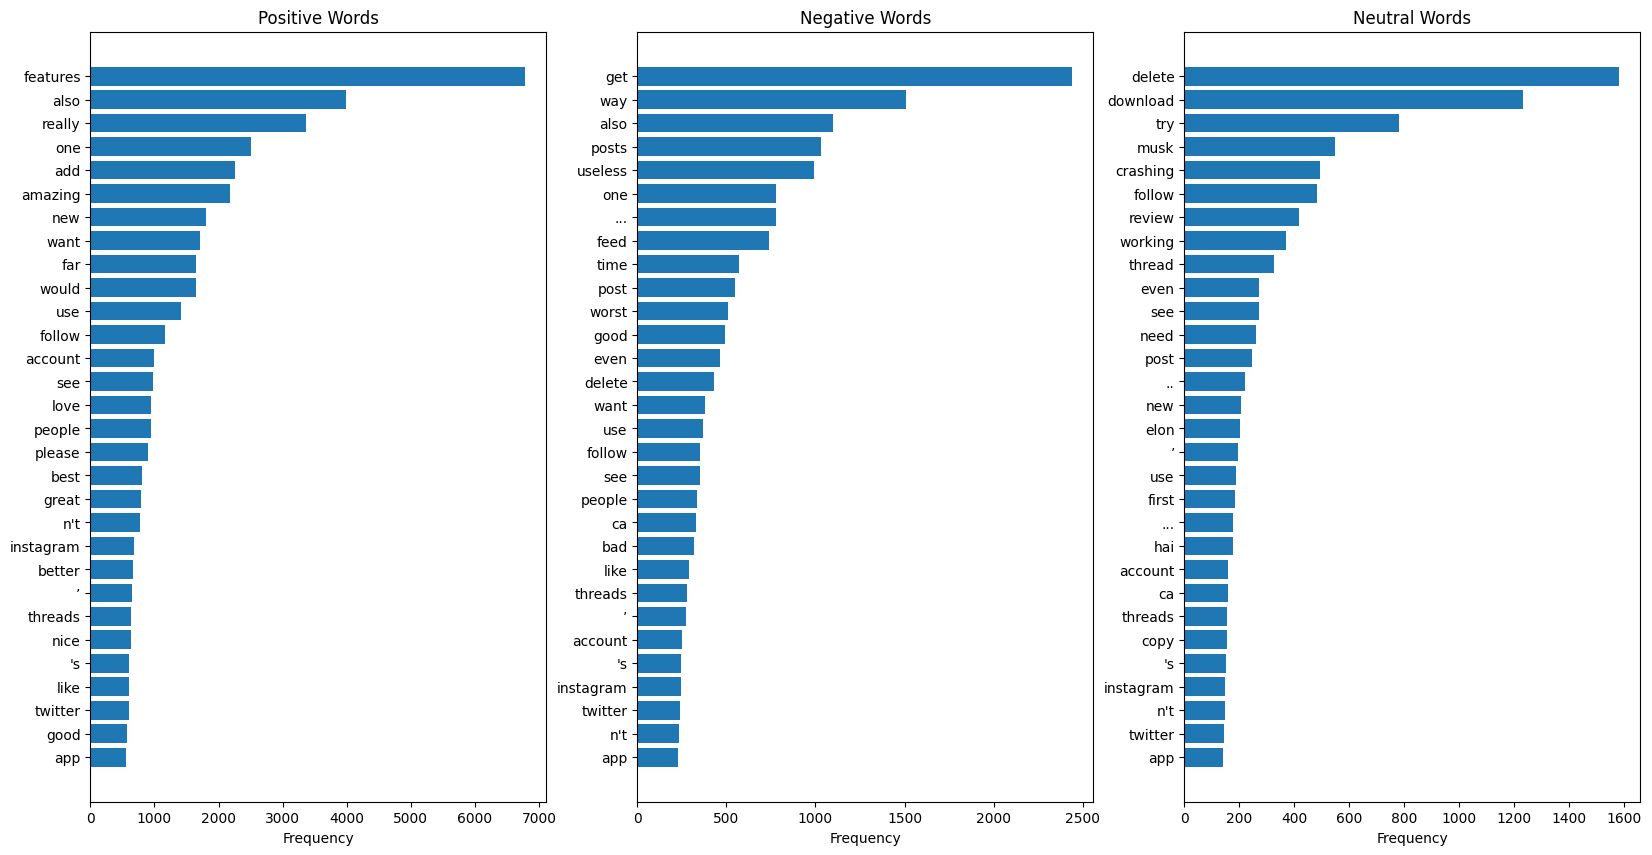

In [17]:
# convert nltk.FreqDist.most_common back to a dict for easier plotting:
freq_pos = dict(nltk.FreqDist(positive_words).most_common(30))
freq_neg = dict(nltk.FreqDist(negative_words).most_common(30))
freq_neutral = dict(nltk.FreqDist(neutral_words).most_common(30))

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))

# sort values from highest to lowest to match above plots
ax[0].barh( list(freq_pos.keys()), sorted( list(freq_pos.values()), reverse=False ) )
ax[0].set_title("Positive Words")
ax[0].set_xlabel("Frequency")
ax[1].set_xlabel("Frequency")
ax[1].set_title("Negative Words")
ax[1].barh( list(freq_neg.keys()), sorted( list(freq_neg.values()), reverse=False ) )
ax[2].set_xlabel("Frequency")
ax[2].set_title("Neutral Words")
ax[2].barh( list(freq_neutral.keys()), sorted( list(freq_neutral.values()), reverse=False ) )
plt.show()

## Insight 5
After plotting some frequency bar plots of the 30 most common words in each type of review (positive, negative, neutral) I found that some notable words in the positive reviews were "features", "add", "use", and "better". The use of these positive words could imply that:
- Users enjoy the "features" of the app.
- The users think the app could be better by "adding" more features.
- The users could see themselves "using" the app in the future.
- The users think the app is "better" than some alternatives.

I found that some notable words in the negative reviews were "useless", "posts", and "feed". The use of these negative words could imply that:
- Users see the app as "useless" in respect to alternatives.
- Users are having trouble with "posts".
- Users do not enjoy what they see on their "feed".

To gain more insight on what vader rated as neutral, I decided to plot common neutral words as well. I found that some notable words in the neutral reviews were "delete", "download", and "crashing". The use of these neutral words could imply that:
- Users have troubling "deleting" things in the app or just want to "delete" the app all together.
- Users raised issues with "downloading" the app or see the app as a good "download".
- Users have issues with the app "crashing".
- The reviews vader counted as neutral may be overwhelmingly negative.

The fact that the reviews vader counted as neutral may be overwhelmingly negative indicates more problems with the sentiment scorer we chose but to work around this, I consider all neutral reviews to be both positive and negative reviews to see if any notable changes occur. We repeat the analysis with this aspect implemented below.

In [18]:
negative = df[df["sentiment"] <= 0]
positive = df[df["sentiment"] >= 0]
neutral = df[df["sentiment"] == 0]

negative["review_description"] = negative["review_description"].apply(getHeavyWords)
positive["review_description"] = positive["review_description"].apply(getHeavyWords)
neutral["review_description"] = neutral["review_description"].apply(getHeavyWords)

# convert word lists into one master word list:
positive_words = positive["review_description"].explode().tolist()
negative_words = negative["review_description"].explode().tolist()
neutral_words = neutral["review_description"].explode().tolist()

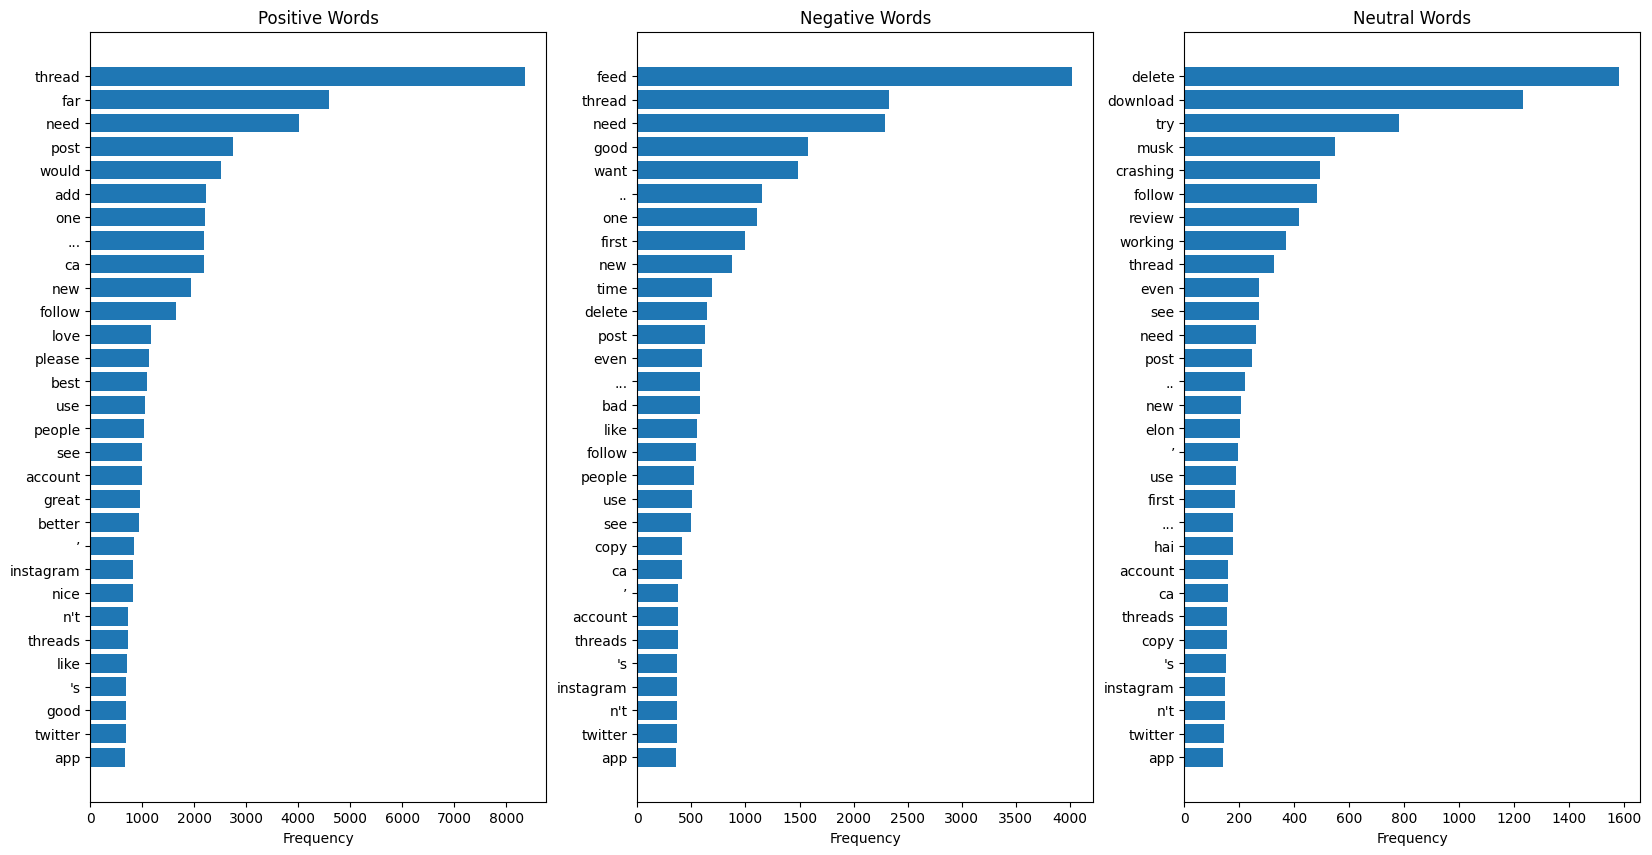

In [19]:
# convert nltk.FreqDist.most_common back to a dict for easier plotting:
freq_pos = dict(nltk.FreqDist(positive_words).most_common(30))
freq_neg = dict(nltk.FreqDist(negative_words).most_common(30))
freq_neutral = dict(nltk.FreqDist(neutral_words).most_common(30))

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))

# sort values from highest to lowest to match above plots
ax[0].barh( list(freq_pos.keys()), sorted( list(freq_pos.values()), reverse=False ) )
ax[0].set_title("Positive Words")
ax[0].set_xlabel("Frequency")
ax[1].set_xlabel("Frequency")
ax[1].set_title("Negative Words")
ax[1].barh( list(freq_neg.keys()), sorted( list(freq_neg.values()), reverse=False ) )
ax[2].set_xlabel("Frequency")
ax[2].set_title("Neutral Words")
ax[2].barh( list(freq_neutral.keys()), sorted( list(freq_neutral.values()), reverse=False ) )
plt.show()

## Insight 6
After repeating the analysis. Nothing significant happens to our most common words for the positive and negative sentiments. However, one notable word that now appears in the positive reviews is the increase in frequency of the word "need". This may suggest that despite positive reviews, the app still "needs" certain features and is missing some things that would make users enjoy the app more.

In [20]:
avg_senti = df.groupby("days_after_launch")["sentiment"].mean().reset_index()
avg_senti_pos = positive.groupby("days_after_launch")["sentiment"].mean().reset_index()
avg_senti_neg = negative.groupby("days_after_launch")["sentiment"].mean().reset_index()

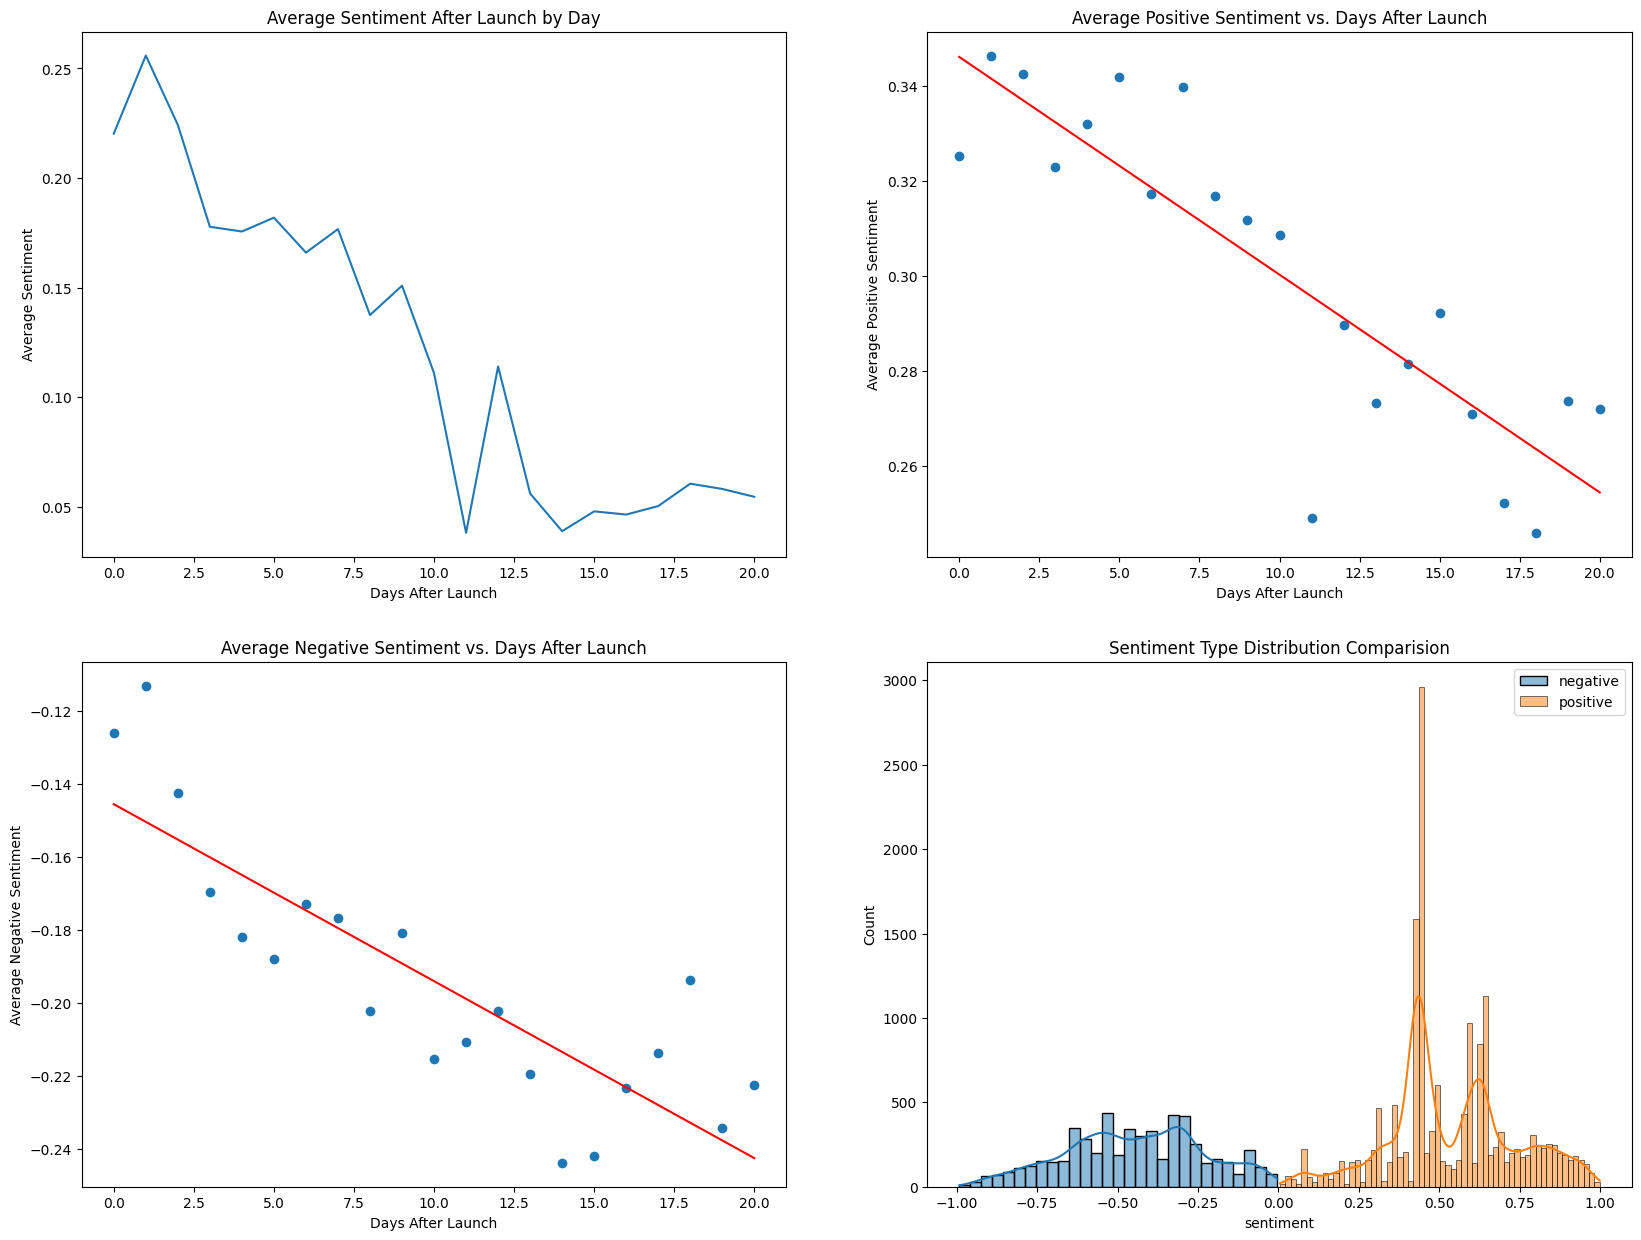

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax[0,0].plot(avg_senti["days_after_launch"], avg_senti["sentiment"])
ax[0,0].set_title("Average Sentiment After Launch by Day")
ax[0,0].set_xlabel("Days After Launch")
ax[0,0].set_ylabel("Average Sentiment")

slope, intercept, r_value, p_value, std_err = stats.linregress(avg_senti_pos["days_after_launch"], avg_senti_pos["sentiment"])

# Create the best-fit line
best_fit_line = [slope * i + intercept for i in list(avg_senti_pos["days_after_launch"])]

# Plot the best-fit line using Matplotlib
ax[0,1].plot(avg_senti_pos["days_after_launch"], best_fit_line, color='red', label='Best Fit Line')
ax[0,1].scatter(avg_senti_pos["days_after_launch"], avg_senti_pos["sentiment"])
ax[0,1].set_title("Average Positive Sentiment vs. Days After Launch")
ax[0,1].set_xlabel("Days After Launch")
ax[0,1].set_ylabel("Average Positive Sentiment")

slope, intercept, r_value, p_value, std_err = stats.linregress(avg_senti_neg["days_after_launch"], avg_senti_neg["sentiment"])

# Create the best-fit line
best_fit_line = [slope * i + intercept for i in list(avg_senti_neg["days_after_launch"])]
ax[1,0].plot(avg_senti_pos["days_after_launch"], best_fit_line, color='red', label='Best Fit Line')
ax[1,0].scatter(avg_senti_neg["days_after_launch"], avg_senti_neg["sentiment"])
ax[1,0].set_title("Average Negative Sentiment vs. Days After Launch")
ax[1,0].set_xlabel("Days After Launch")
ax[1,0].set_ylabel("Average Negative Sentiment")

sns.histplot(df[df["sentiment"] < 0]["sentiment"], kde=True, label="negative")
sns.histplot(df[df["sentiment"] > 0]["sentiment"], kde=True, label="positive")

ax[1,1].set_title("Sentiment Type Distribution Comparision")
ax[1,1].legend()

plt.show()

## Insight 7
In order to further evaulate how users felt about the app over time, I plotted some additional plots that would tell us more about the general trend of sentiment over time.

#### Average Sentiment After Launch by Day
This plot displays how the daily average sentiment towards the app is decreasing over time but may be flattening out around 0, neutral sentiment. This either implies that generally people that get app the later don't enjoy the app as much as those who get it at the beginning or that people begin to dislike the app over time. 

#### Average Positive Sentiment vs. Days After Launch
I wanted to evaluate the trend of positive sentiment to dive deeper into the average sentiment plot. What I found was that daily average positive sentiment towards the app was on a negative decline since the app's launch. Although, this still could imply that negative sentiment could be becoming more positive over time.

#### Average Negative Sentiment vs. Days After Launch
To evaluate the trend of negative sentiment with suspicion that negative sentiment could be becoming more positive over time, I plotted this plot. Unfortunately, it appears that negative sentiment is also becoming more negative over time. However, this decline has a smaller slope than the positive sentiment which explains why the average sentiment plot begins to flatten out around 0.

#### Sentiment Type Distribution Comparision
This plot displays the extreme sentiment (positive and negative) distributions excluding neutral sentiment. 

## Insight 8
Even though it may appear the Threads app has a lot positive sentiment towards the app, our further analysis tells us that the average sentiment is on the decline over time. But once again, an important thing to note is how we scored the sentiment thus we may have some information loss since a lot of the reviews were rated as neutral. We took this into account and let neutral sentiments be classfied as both negative and positive sentiments in our common words analysis. This still however leaves concerns about our sentiment scoring system. 

To address this concern, I wanted to try out another sentiment scoring system. Below, I experimented with the TextBlob sentiment analysis package. However, we see that the results follow a similar distribution as before with an overwhelming majority of reviews being classified as neutral.

Unfortunately due to time constraints, I was unable to explore our methods of sentiment scoring for my analysis. This is however a great future direction to explore.

In [24]:
def getSentiment_2(review):
    # Create a TextBlob object
    blob = TextBlob(review)

    # Get sentiment scores
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    return polarity

<Axes: xlabel='sentiment', ylabel='Count'>

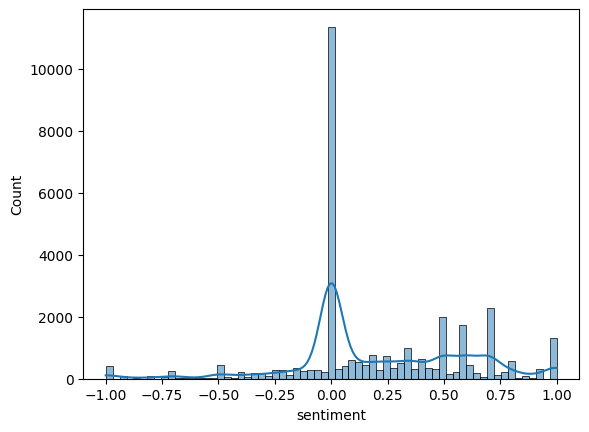

In [25]:
df["sentiment"] = df["review_description"].apply(getSentiment_2)
sns.histplot(df["sentiment"], kde=True)

# Discussion
## Does the Threads app possess signs of longevity in the oligopoly of social media apps, based on what people commonly say about the app?
After conducting exploratory data analysis on our reviews dataset, we conclude that the sentiment towards the app is currently declining overtime in our dataset. **Thus, our analysis of Threads app user reviews (primarily from Google Play) does not show any evidence of the app having longevity in the oligopoly of social media apps.** 

However, this conclusion is not indicative of the app's overall popularity. There are still various other factors we need to consider when making conclusions on popularity projections. First, our dataset suffers from survey bias where only users who have strong feelings towards the app will leave reviews. Second, our dataset does not provide a hollistic view of all reviews as the majority of reviews were from Google Play. Third, to truly make a conclusion about the popularity and longetivity of the app, we need to consider social and political factors regarding the app. For example, Twitter is threatening to sue Meta in regards to the Threads app. This fact is vaguely represented in our data and not truly represented in our dataset. Fourth, our sentiment analyzer classifed a majority of the reviews as netural despite the majority of the ratings being 1 (lowest) or 5 (highest). This tells us that other sentiment analysis algorithms may need to be explored before coming to an overall consensus. 

Therefore, due to limitations in our dataset and sentiment analyzer, it would be unfair and not true to conclude in our analysis that the overall consensus on the Threads app is becoming more negative over time. However, we can say based on the user reviews provided, the reviews of the Threads app appear to more negative over time.
## Significance
Even though we are unable to make conclusions on overall consensus because of limitations in our data, our analysis still provided us with a conclusion on a sample of the Threads app user population. Is it representative of the whole population? We're not sure, more analysis would be needed. However, our analysis on our sample does tell us more about social beahviors towards social media app launches. For example, it appears that the majority of initial feedback will be positive because those customers most loyal to the company will be the ones downloading the app first. However, it is the later reviews that will determine the trajectory of the app as more people download the app. This tells us that building a successful social media app may not require an initial loyal fanbase prior to launch but building the fanbase multiple days after launch is more important for longevity. 

Once again, I'd like to reiterate we can only conclude this about our sample and this sample may not be representative of the whole population but it does provide a little insight on behaviors of this population.

## Acknowledgements 
I'd like to thank Professor Winjum for his informative notebooks that he provided me throughout the year to learn more about exploratory data analysis. 